In [15]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller


In [2]:
pip install yfinance

     ---------------------------------------- 0.0/948.2 kB ? eta -:--:--
     ------------------------------------- 948.2/948.2 kB 14.6 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for peewee: filename=peewee-3.17.8-py3-none-any.whl size=139012 sha256=1e790b6e11860ae3c5491a3d377ec730ffb68681cba231821afeb94bcd41d51d
  Stored in directory: c:\users\lenovo pc\appdata\local\pip\cache\wheels\8f\65\34\456800445efeafb05164fe95285c70e81ba1d96bae30f43917
Successfully built peewee
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Installer les packages nécessaires
# pip install yfinance pandas

import yfinance as yf
import pandas as pd

# Définir le ticker et la plage de dates
ticker = "NVDA"
start_date = "2020-01-01"
end_date = "2024-12-31"

# Récupérer les données depuis Yahoo Finance
nvidia_data = yf.download(ticker, start=start_date, end=end_date)

# Afficher les premières lignes des données
print(nvidia_data.head())

# Convertir en DataFrame et inclure une colonne 'date'
nvidia_df = nvidia_data.reset_index()
print(nvidia_df.head())


[*********************100%***********************]  1 of 1 completed

Price          Close      High       Low      Open     Volume
Ticker          NVDA      NVDA      NVDA      NVDA       NVDA
Date                                                         
2020-01-02  5.972711  5.972711  5.893294  5.943832  237536000
2020-01-03  5.877112  5.920928  5.828067  5.852963  205384000
2020-01-06  5.901759  5.906987  5.757614  5.783754  262636000
2020-01-07  5.973208  6.019016  5.885078  5.930139  314856000
2020-01-08  5.984411  6.025738  5.928894  5.968976  277108000
Price        Date     Close      High       Low      Open     Volume
Ticker                 NVDA      NVDA      NVDA      NVDA       NVDA
0      2020-01-02  5.972711  5.972711  5.893294  5.943832  237536000
1      2020-01-03  5.877112  5.920928  5.828067  5.852963  205384000
2      2020-01-06  5.901759  5.906987  5.757614  5.783754  262636000
3      2020-01-07  5.973208  6.019016  5.885078  5.930139  314856000
4      2020-01-08  5.984411  6.025738  5.928894  5.968976  277108000


In [6]:
summary = nvidia_df.describe()
summary

Price,Date,Close,High,Low,Open,Volume
Ticker,,NVDA,NVDA,NVDA,NVDA,NVDA
count,1257,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03
mean,2022-06-30 22:13:27.637231616,38.369700,39.077611,37.595167,38.371132,4.470372e+08
min,2020-01-02 00:00:00,4.892426,5.229714,4.500833,4.984595,9.788400e+07
25%,2021-04-01 00:00:00,13.572305,13.824405,13.333922,13.601479,3.088640e+08
50%,2022-06-30 00:00:00,21.226318,21.729197,20.795876,21.168408,4.212450e+08
75%,2023-09-29 00:00:00,45.564079,46.200838,44.902618,45.702026,5.470070e+08
max,2024-12-30 00:00:00,148.869751,152.879470,146.249911,149.339720,1.543911e+09
std,NaN,38.153295,38.859773,37.405898,38.207275,1.876080e+08


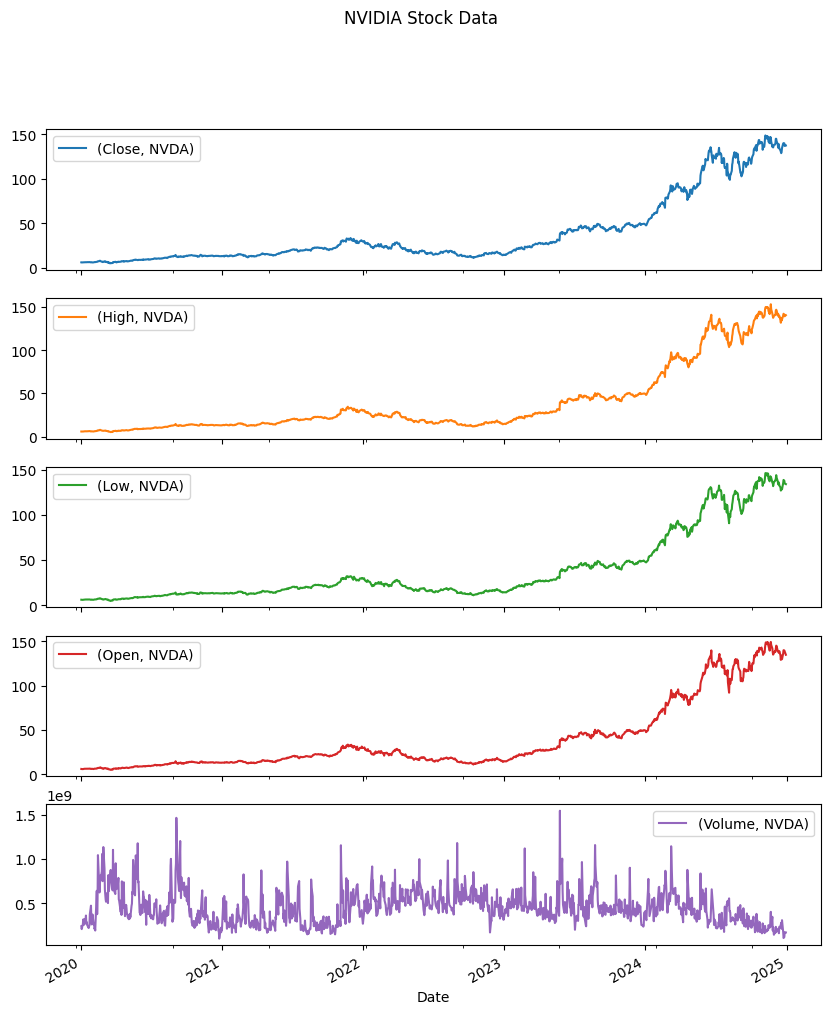

In [7]:
import matplotlib.pyplot as plt

# Tracer toutes les colonnes par rapport à la date
nvidia_df.plot(x='Date', subplots=True, figsize=(10, 12), title='NVIDIA Stock Data')
plt.show()

In [10]:
nvidia_df.rename(columns={'Adj Close': 'Adj_Close',
                          'Close,NVDA': 'Close',
                          'High,NVDA': 'High',
                          'Low,NVDA': 'Low',
                            'Open,NVDA': 'Open',
                            'Volume,NVDA': 'Volume',
                             }, inplace=True)

In [13]:
nvidia_df.Date = pd.to_datetime(nvidia_df.Date)

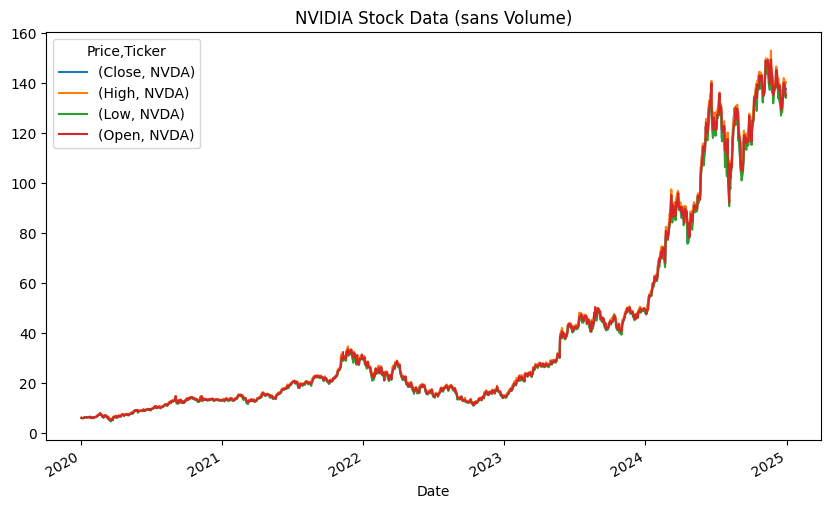

In [14]:
# Tracer toutes les colonnes sauf le volume par rapport à la date
nvidia_df.plot(x='Date', y=['Close', 'High', 'Low', 'Open'], figsize=(10, 6), title='NVIDIA Stock Data (sans Volume)')
plt.show()

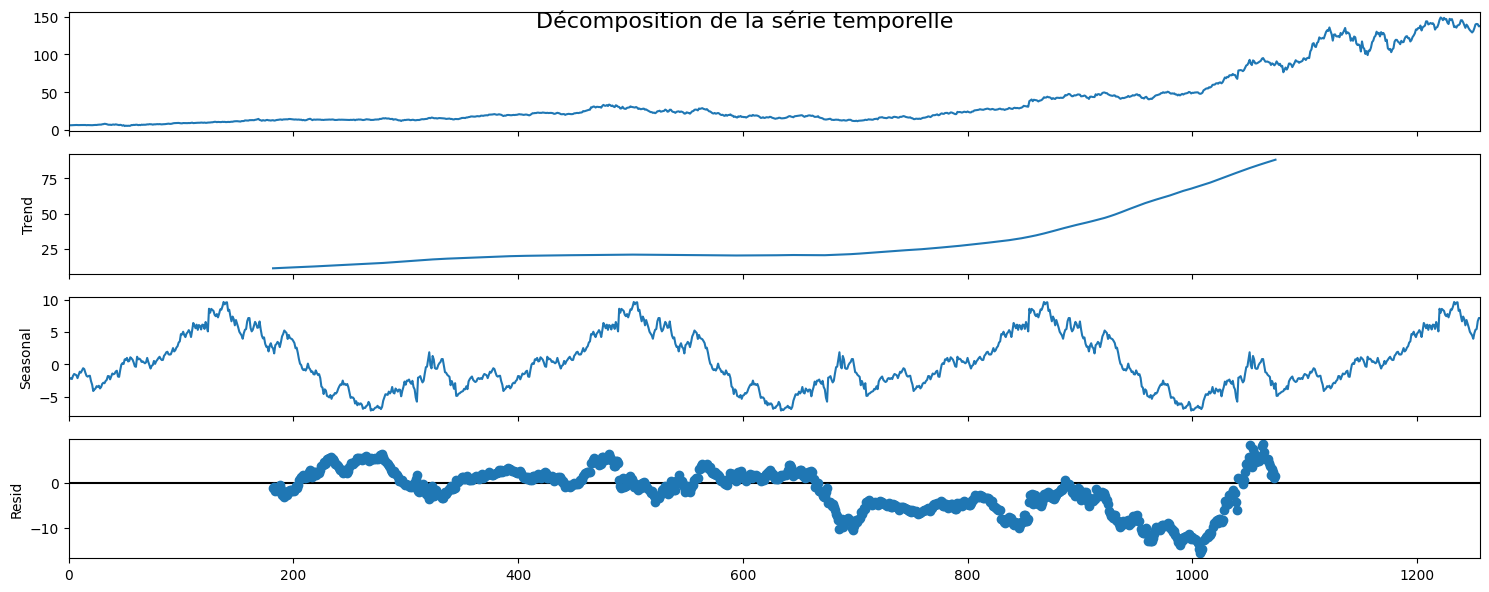

In [16]:

# Créer une série temporelle à partir de la colonne 'Close'
nvidia_ts = nvidia_df['Close']

# Décomposer la série temporelle
decomposition = seasonal_decompose(nvidia_ts, model='additive', period=365)

# Affichage des résultats
decomposition.plot()
plt.suptitle('Décomposition de la série temporelle', fontsize=16)
plt.show()


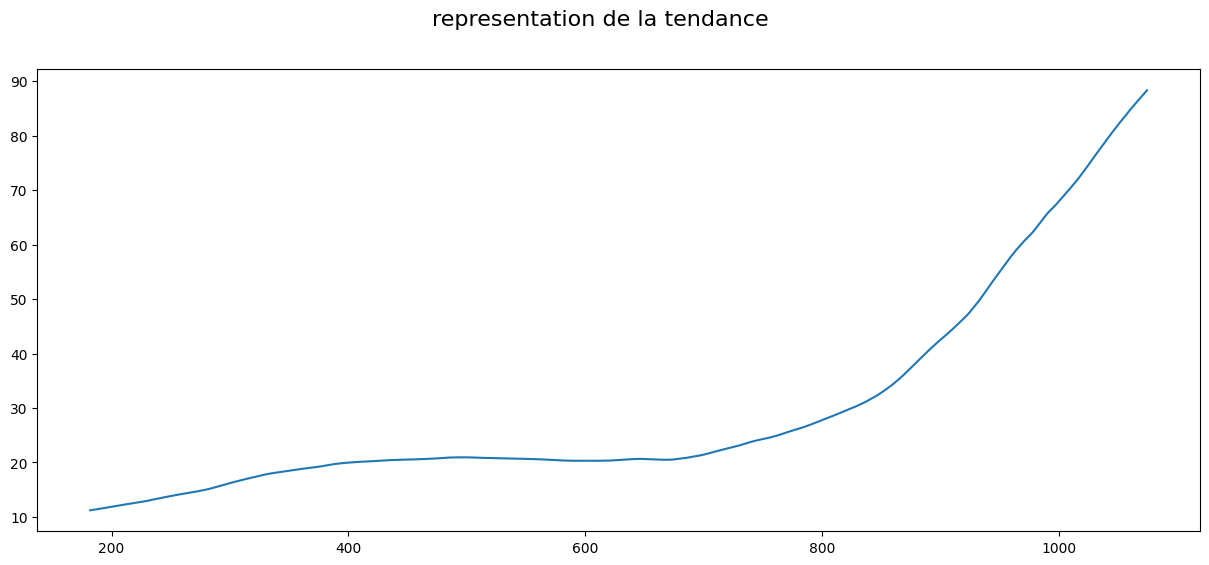

In [17]:
tendance = decomposition.trend
tendance.plot()
plt.suptitle('representation de la tendance', fontsize=16)
plt.show()


In [20]:
from statsmodels.tsa.stattools import adfuller

# Effectuer le test de Dickey-Fuller augmenté
result = adfuller(nvidia_ts['NVDA'])

# Extraire les résultats
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

# Afficher les résultats
print('ADF Statistic:', adf_statistic)
print('p-value:', p_value)
print('Critical Values:')
for key, value in critical_values.items():
    print(f'   {key}: {value}')

ADF Statistic: 1.1101207242905926
p-value: 0.995302079937024
Critical Values:
   1%: -3.4356560275160835
   5%: -2.8638831211270817
   10%: -2.568017509711682


La seie n'est pas stationnaire on applique donc la diferenciation

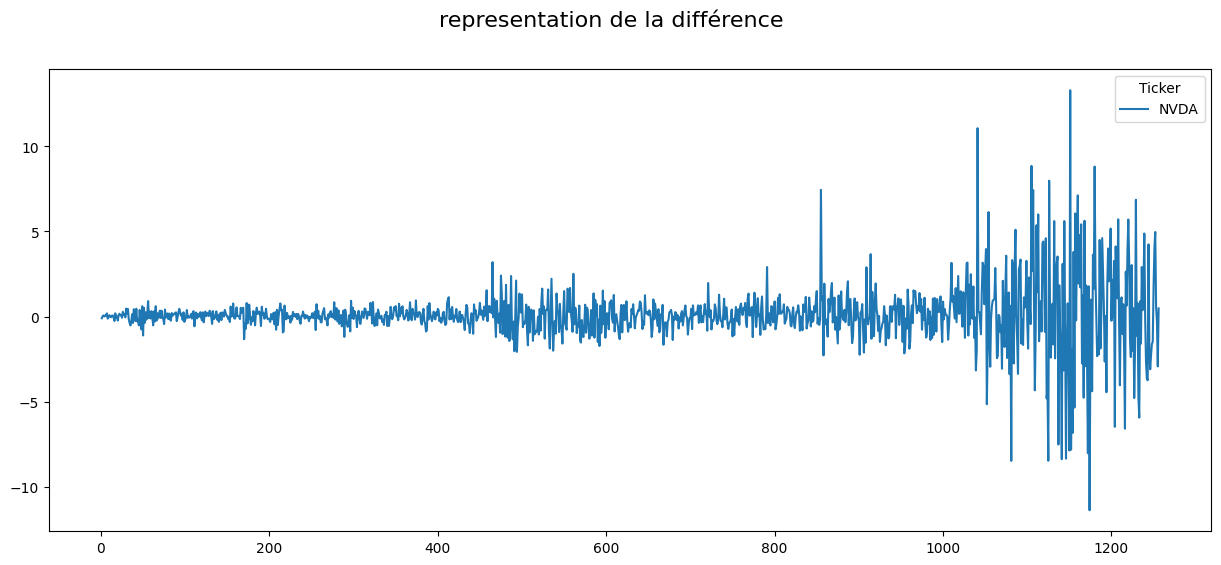

In [21]:
nvidia_ts_dif=nvidia_ts.diff().dropna()
nvidia_ts_dif.plot()
plt.suptitle('representation de la différence', fontsize=16)
plt.show()

In [22]:

# Effectuer le test de Dickey-Fuller augmenté sur la série de différences
result_dif = adfuller(nvidia_ts_dif['NVDA'])

# Extraire les résultats
adf_statistic_dif = result_dif[0]
p_value_dif = result_dif[1]
critical_values_dif = result_dif[4]

# Afficher les résultats
print('ADF Statistic (diff):', adf_statistic_dif)
print('p-value (diff):', p_value_dif)
print('Critical Values (diff):')
for key, value in critical_values_dif.items():
    print(f'   {key}: {value}')

# Déterminer si la série est stationnaire
if adf_statistic_dif < critical_values_dif['5%']:
    print("La série de différences est stationnaire.")
else:
    print("La série de différences n'est pas stationnaire.")

ADF Statistic (diff): -7.010172105923996
p-value (diff): 6.954667495135061e-10
Critical Values (diff):
   1%: -3.4356689751083374
   5%: -2.8638888336592387
   10%: -2.5680205519744055
La série de différences est stationnaire.


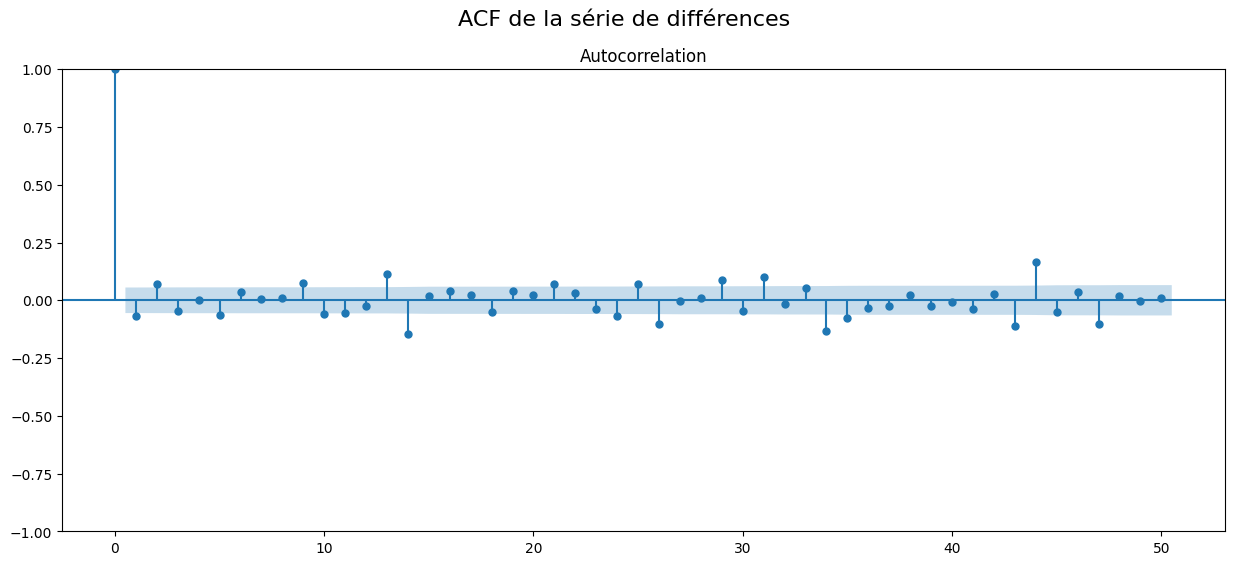

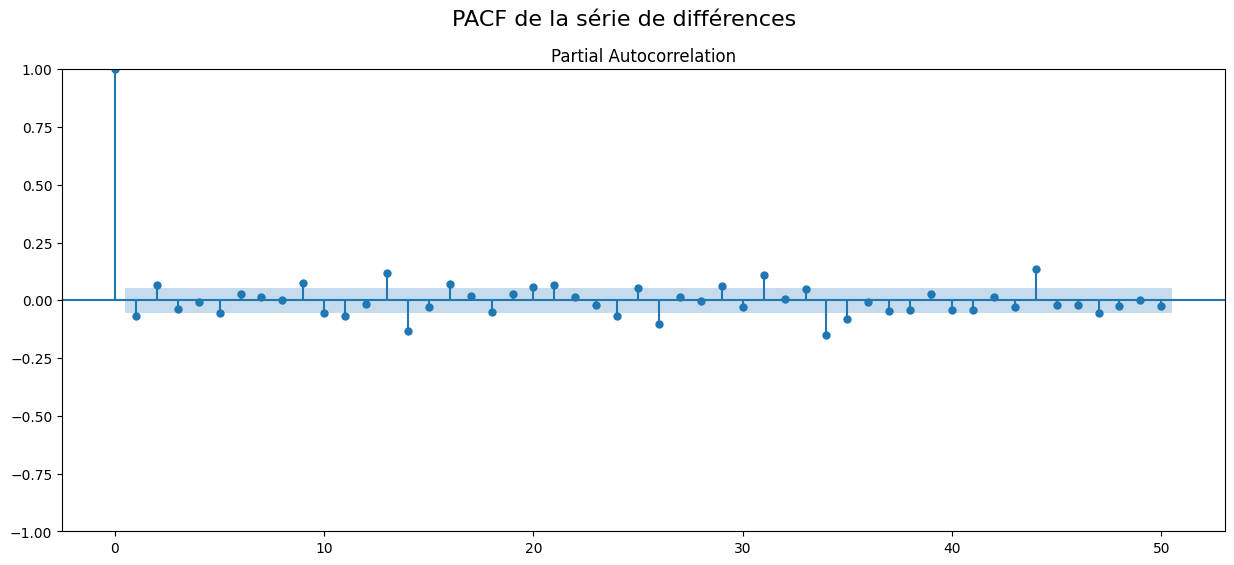

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Représentation de l'ACF
plot_acf(nvidia_ts_dif['NVDA'], lags=50)
plt.suptitle('ACF de la série de différences', fontsize=16)
plt.show()

# Représentation du PACF
plot_pacf(nvidia_ts_dif['NVDA'], lags=50)
plt.suptitle('PACF de la série de différences', fontsize=16)
plt.show()

In [24]:
import warnings
from statsmodels.tsa.arima.model import ARIMA

# Ignorer les avertissements
warnings.filterwarnings("ignore")

# Initialiser les variables pour stocker les meilleurs modèles
best_aic = float("inf")
best_bic = float("inf")
best_order_aic = None
best_order_bic = None
best_model_aic = None
best_model_bic = None

# Faire varier les ordres p et q entre 0 et 5
for p in range(6):
    for q in range(6):
        try:
            # Ajuster le modèle ARIMA
            model = ARIMA(nvidia_ts_dif['NVDA'], order=(p, 0, q))
            results = model.fit()

            # Vérifier et mettre à jour le meilleur modèle selon AIC
            if results.aic < best_aic:
                best_aic = results.aic
                best_order_aic = (p, 0, q)
                best_model_aic = results

            # Vérifier et mettre à jour le meilleur modèle selon BIC
            if results.bic < best_bic:
                best_bic = results.bic
                best_order_bic = (p, 0, q)
                best_model_bic = results

        except Exception as e:
            continue

# Afficher les résultats
print(f"Meilleur modèle selon AIC: ARIMA{best_order_aic} - AIC:{best_aic}")
print(f"Meilleur modèle selon BIC: ARIMA{best_order_bic} - BIC:{best_bic}")

Meilleur modèle selon AIC: ARIMA(5, 0, 5) - AIC:4857.429568406259
Meilleur modèle selon BIC: ARIMA(0, 0, 0) - BIC:4904.756403265418
